In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
file_path = '95k-random.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)
data.head

<bound method NDFrame.head of        account_age  no_follower  no_following  no_userfavourites  no_lists  \
0           1235.0         12.0          31.0                0.0       0.0   
1            695.0        126.0         569.0               16.0       0.0   
2            448.0          4.0          63.0                0.0       1.0   
3           1322.0          8.0         294.0                2.0       0.0   
4            111.0       1461.0        1365.0              438.0      10.0   
...            ...          ...           ...                ...       ...   
99995        440.0       2270.0        1637.0             1341.0       3.0   
99996       1311.0        159.0         246.0             1963.0      13.0   
99997       1479.0        751.0         465.0               12.0      35.0   
99998       1600.0        716.0         285.0               35.0       6.0   
99999         50.0         28.0          71.0                3.0       0.0   

       no_tweets  no_retweets  no

In [18]:
# Step 2: Preprocessing
# Separate features and labels
X = data.drop('class', axis=1)
y = data['class']

In [19]:
# Normalize the feature values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the mapping
print("Classes and their encoded values:", label_encoder.classes_)


Classes and their encoded values: ["b'non-spammer'" "b'spammer'"]


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [22]:
# Reshape input for LSTM [samples, timesteps, features]
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [23]:
# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 12), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
# Step 4: Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9505 - loss: 0.3257 - val_accuracy: 0.9505 - val_loss: 0.1893
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1907 - val_accuracy: 0.9502 - val_loss: 0.1856
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9505 - loss: 0.1857 - val_accuracy: 0.9503 - val_loss: 0.1839
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9492 - loss: 0.1874 - val_accuracy: 0.9508 - val_loss: 0.1809
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9499 - loss: 0.1846 - val_accuracy: 0.9520 - val_loss: 0.1782
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1798 - val_accuracy: 0.9520 - val_loss: 0.1765
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9523 - loss: 0.1752 - val_accuracy: 0.9523 - val_loss: 0.1748
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9509 - loss: 0.1775 - 

In [26]:
# Step 5: Evaluate the model
accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Test Accuracy: {accuracy[1] * 100:.2f}%')


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9504 - loss: 0.1766
Test Accuracy: 95.23%


In [27]:
# Step 6: Predictions and Confusion Matrix
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


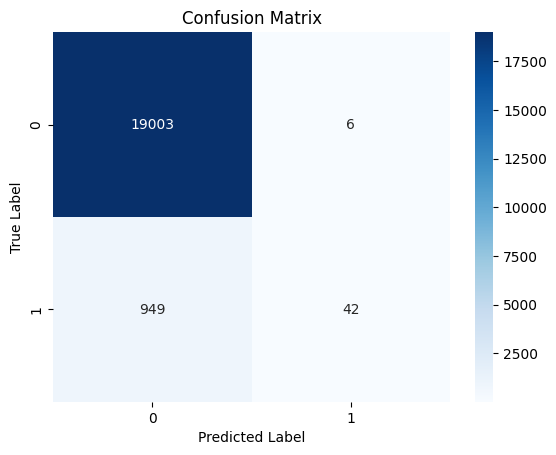

In [28]:
# Step 7: Visualization - Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

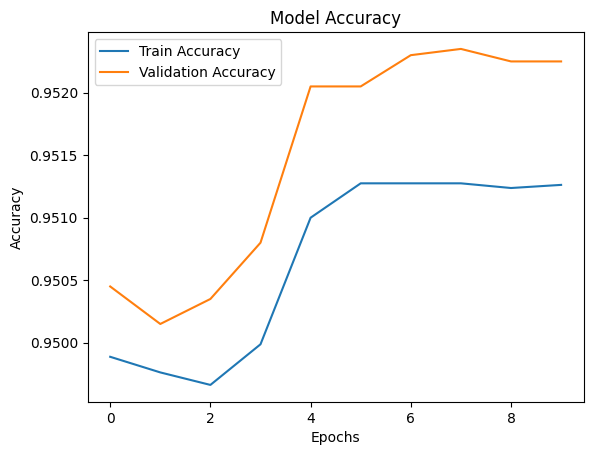

In [29]:
# Step 8: Plot Accuracy and Loss graphs
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

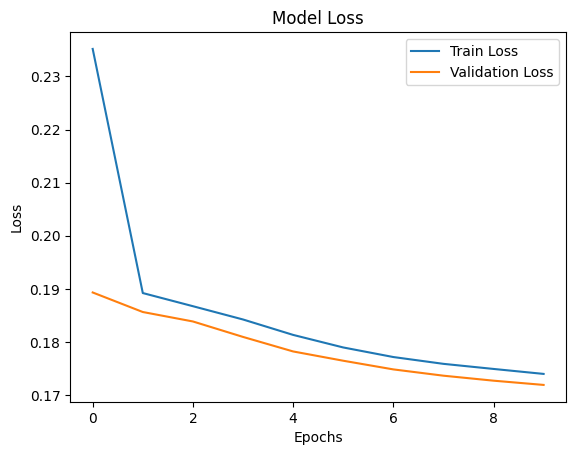

In [30]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
# Step 9: Test on a specific instance
# Example instance (replace with actual data if needed)
example_instance = X_test_reshaped[0].reshape(1, 1, 12)  # Using the first instance from the test set

# Predict class for the example instance
predicted_class = model.predict(example_instance)
predicted_label = (predicted_class > 0.5).astype("int32")
actual_label = y_test[0]

print(f"Predicted Label: {predicted_label[0][0]}, Actual Label: {actual_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predicted Label: 0, Actual Label: 0
